# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

Importing dataset into a dataframe

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

# Exploratory Data Analysis(EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
print('Dataset Shape: ',df.shape)
print('\nSum of Null Values:\n', df.isnull().sum())
print('\nStatistics: ')
df.describe()

Dataset Shape:  (5110, 12)

Sum of Null Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Statistics: 


id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [ ]:
print('Unique Values:\n')
for i in df.head():
  print(i,' : ', df[i].unique())

Unique Values:

id  :  [ 9046 51676 31112 ... 19723 37544 44679]
gender  :  ['Male' 'Female' 'Other']
age  :  [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00

In [ ]:
print('Correlation with Stroke: ')
df.corrwith(df.stroke)

Correlation with Stroke: 


id                   0.006388
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.042374
stroke               1.000000
dtype: float64

**Data Visualization**

1. Histogram

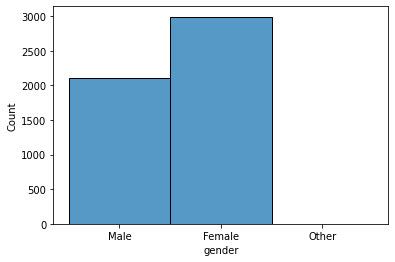

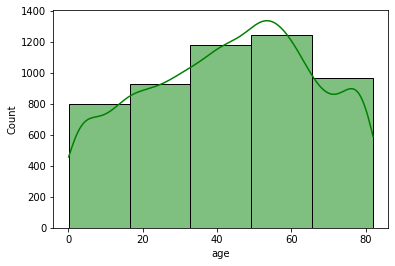

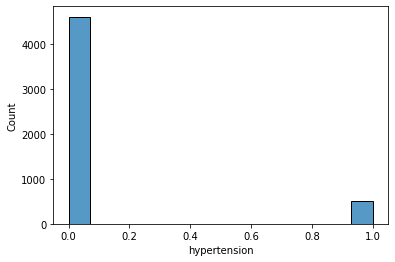

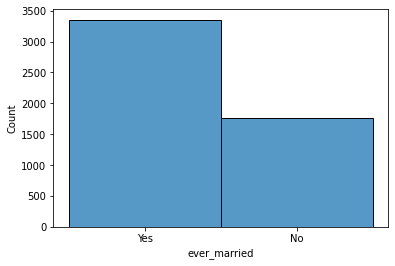

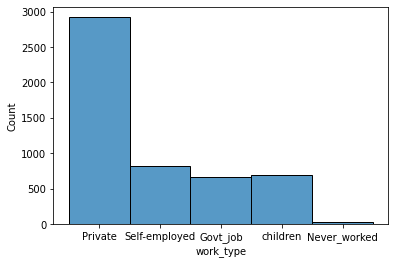

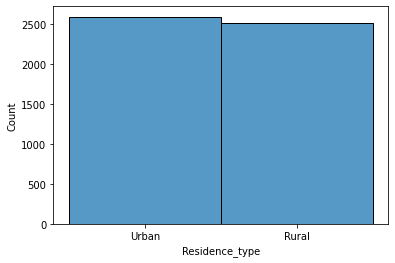

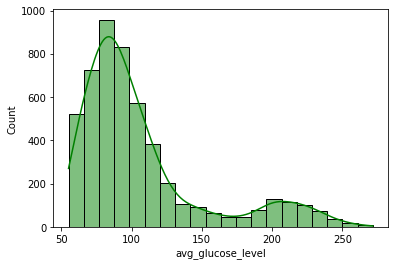

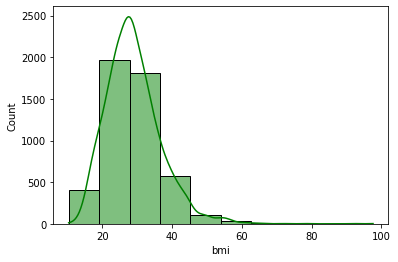

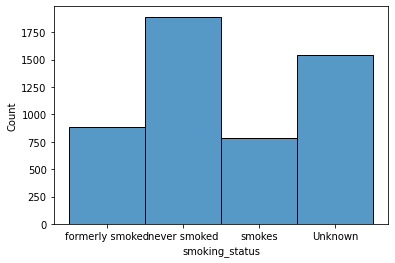

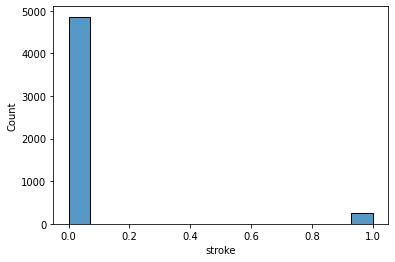

In [ ]:
sns.histplot(data = df.gender)
plt.show()
sns.histplot(data = df.age, bins = 5, color = 'g', kde = True)
plt.show()
sns.histplot(data = df.hypertension)
plt.show()
sns.histplot(data = df.ever_married)
plt.show()
sns.histplot(data = df.work_type)
plt.show()
sns.histplot(data = df.Residence_type)
plt.show()
sns.histplot(data = df.avg_glucose_level, bins = 20, color = 'g', kde = True)
plt.show()
sns.histplot(data = df.bmi, bins = 10, color = 'g', kde = True)
plt.show()
sns.histplot(data = df.smoking_status)
plt.show()
sns.histplot(data = df.stroke)
plt.show()

2. Box Plot

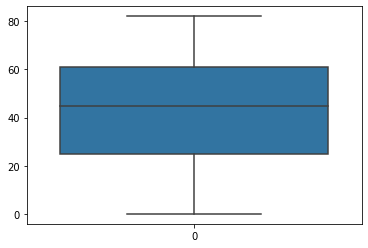

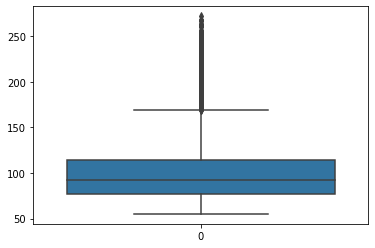

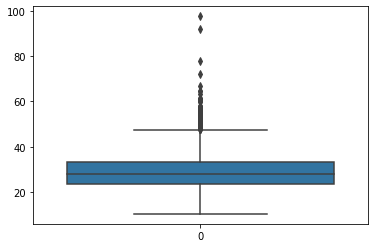

In [ ]:
sns.boxplot(data = df.age)
plt.show()
sns.boxplot(data = df.avg_glucose_level)
plt.show()
sns.boxplot(data = df.bmi)
plt.show()

3. Heat Map

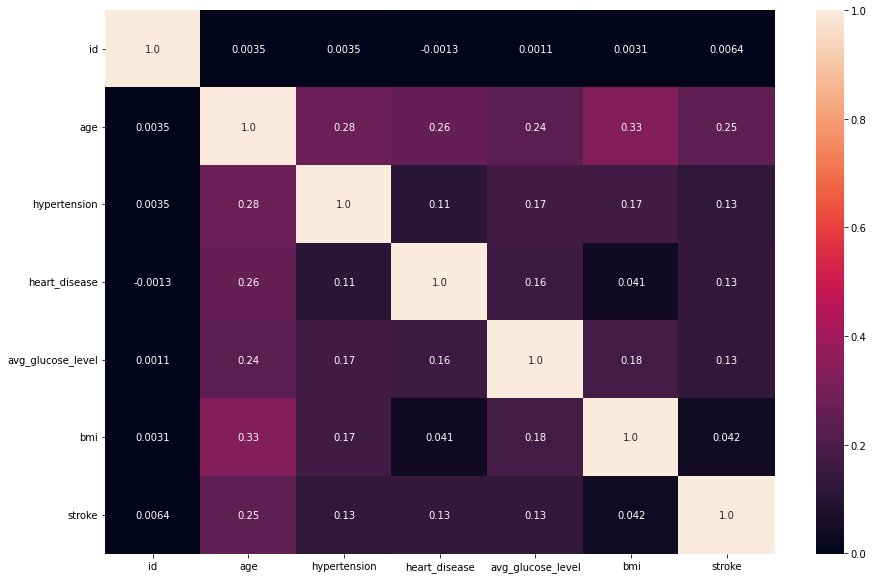

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

4. Count Plot

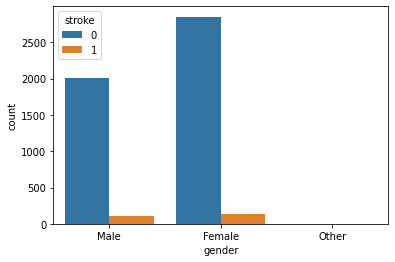

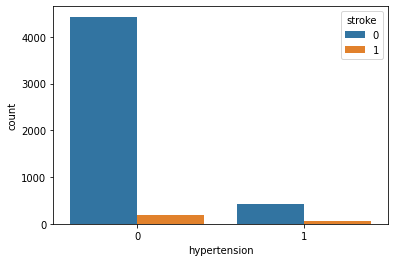

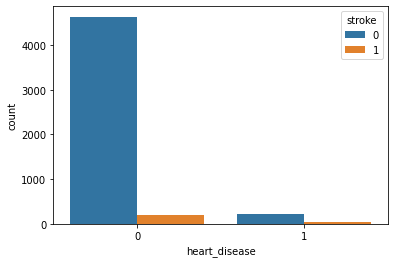

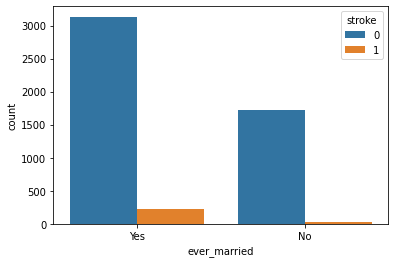

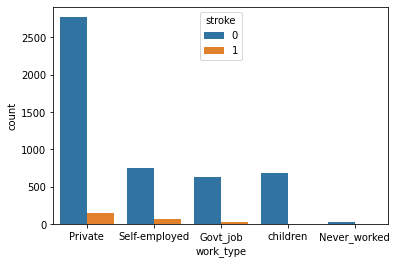

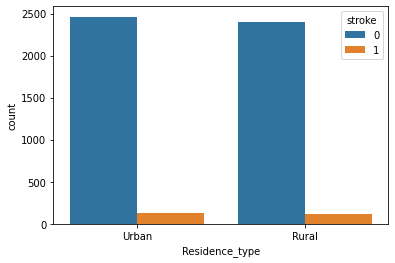

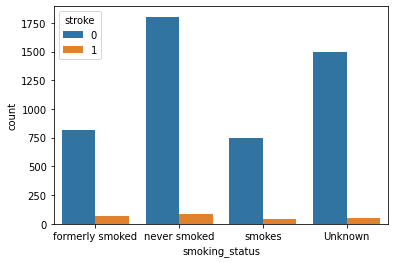

In [ ]:
sns.countplot(data=df, x="gender", hue="stroke")
plt.show()
sns.countplot(data=df,x='hypertension',hue='stroke')
plt.show()
sns.countplot(data=df,x='heart_disease',hue='stroke')
plt.show()
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.show()
sns.countplot(data=df,x='work_type',hue='stroke')
plt.show()
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.show()
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.show()

5. Scatter Plot

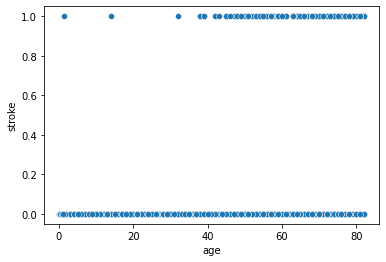

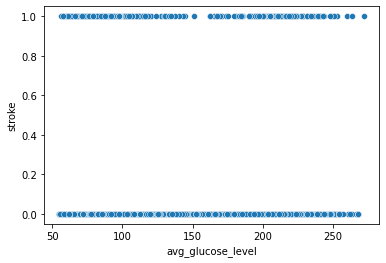

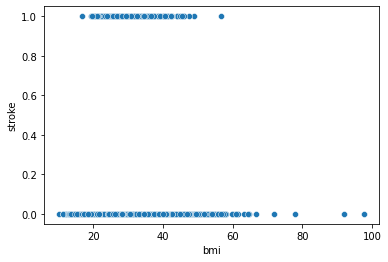

In [ ]:
sns.scatterplot(x = df.age, y = df.stroke)
plt.show()
sns.scatterplot(x = df.avg_glucose_level, y = df.stroke)
plt.show()
sns.scatterplot(x = df.bmi, y = df.stroke)
plt.show()

6.Pair Plot

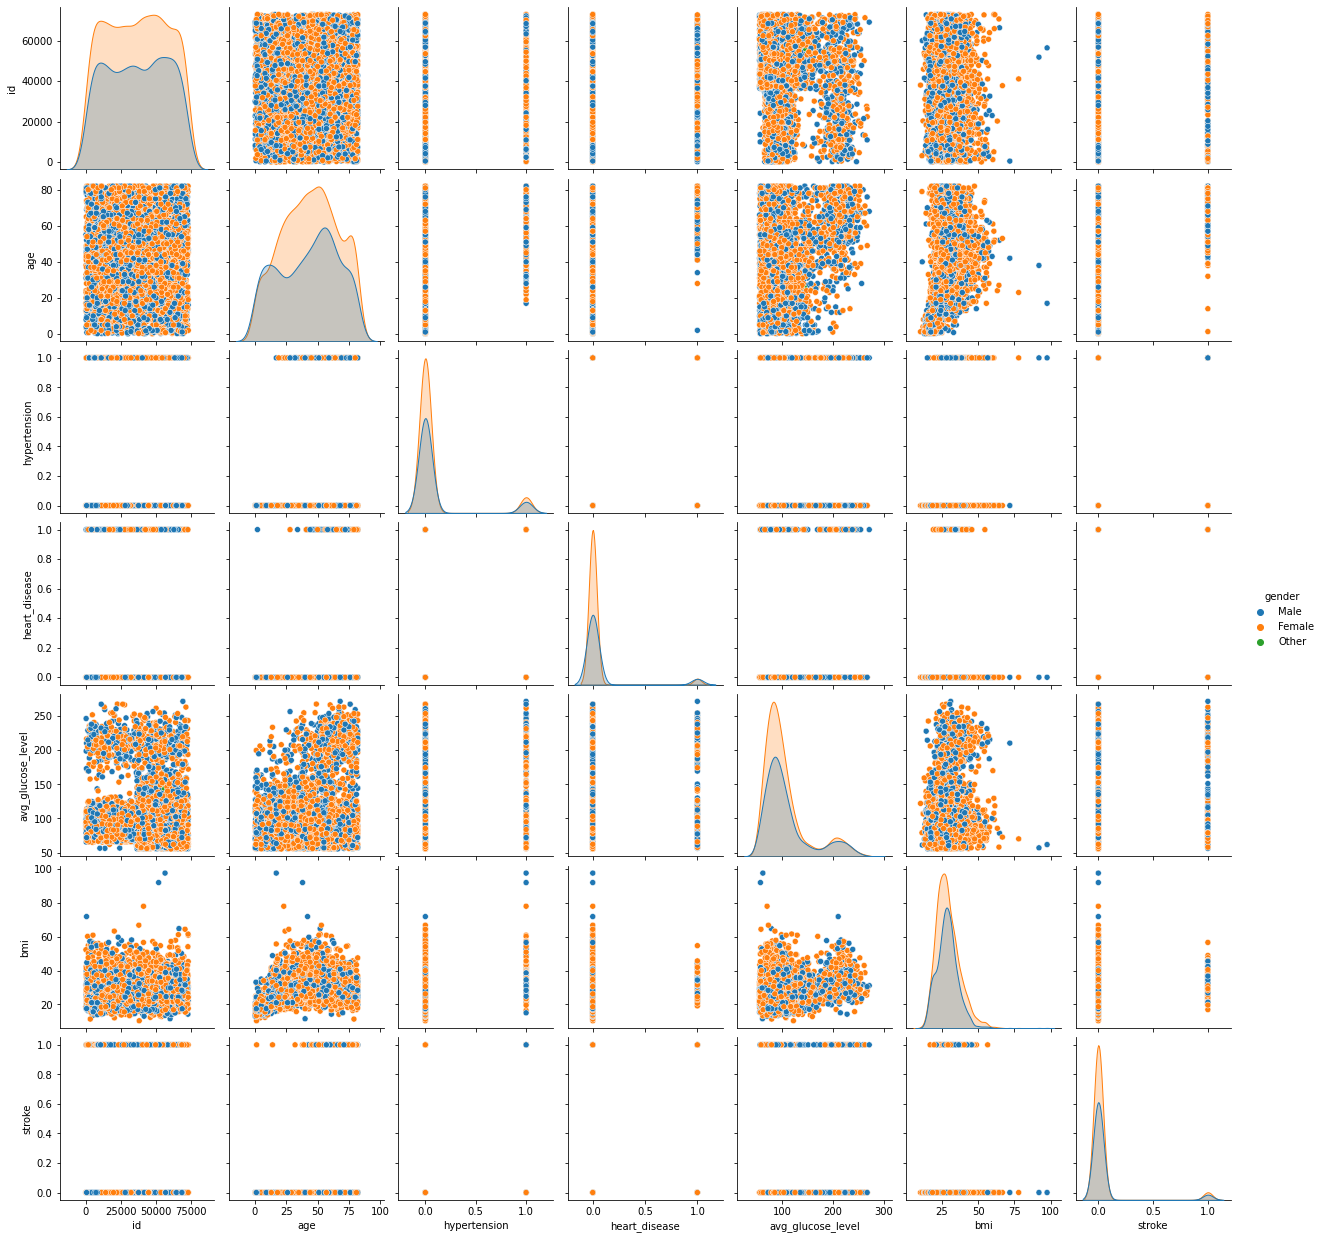

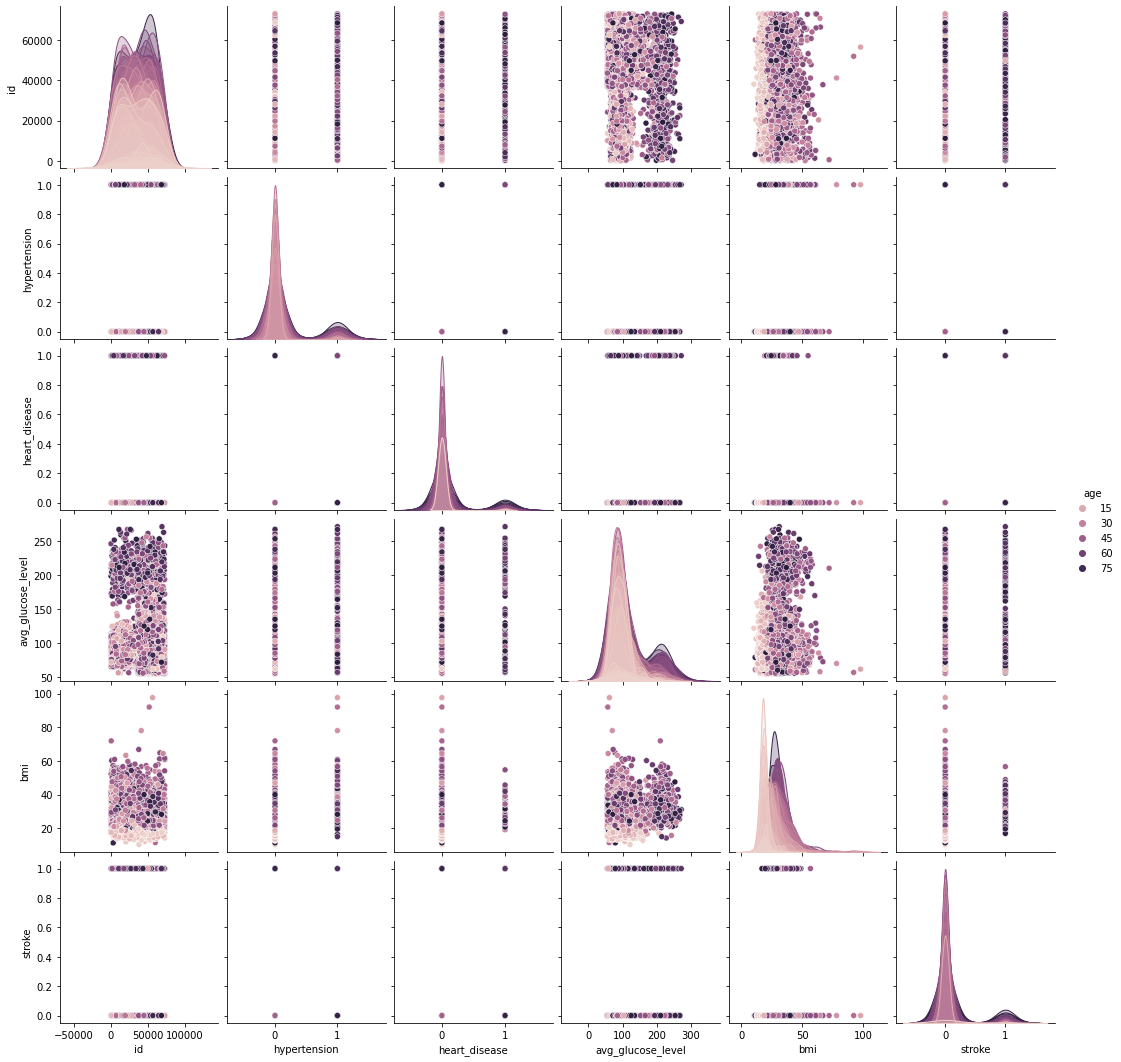

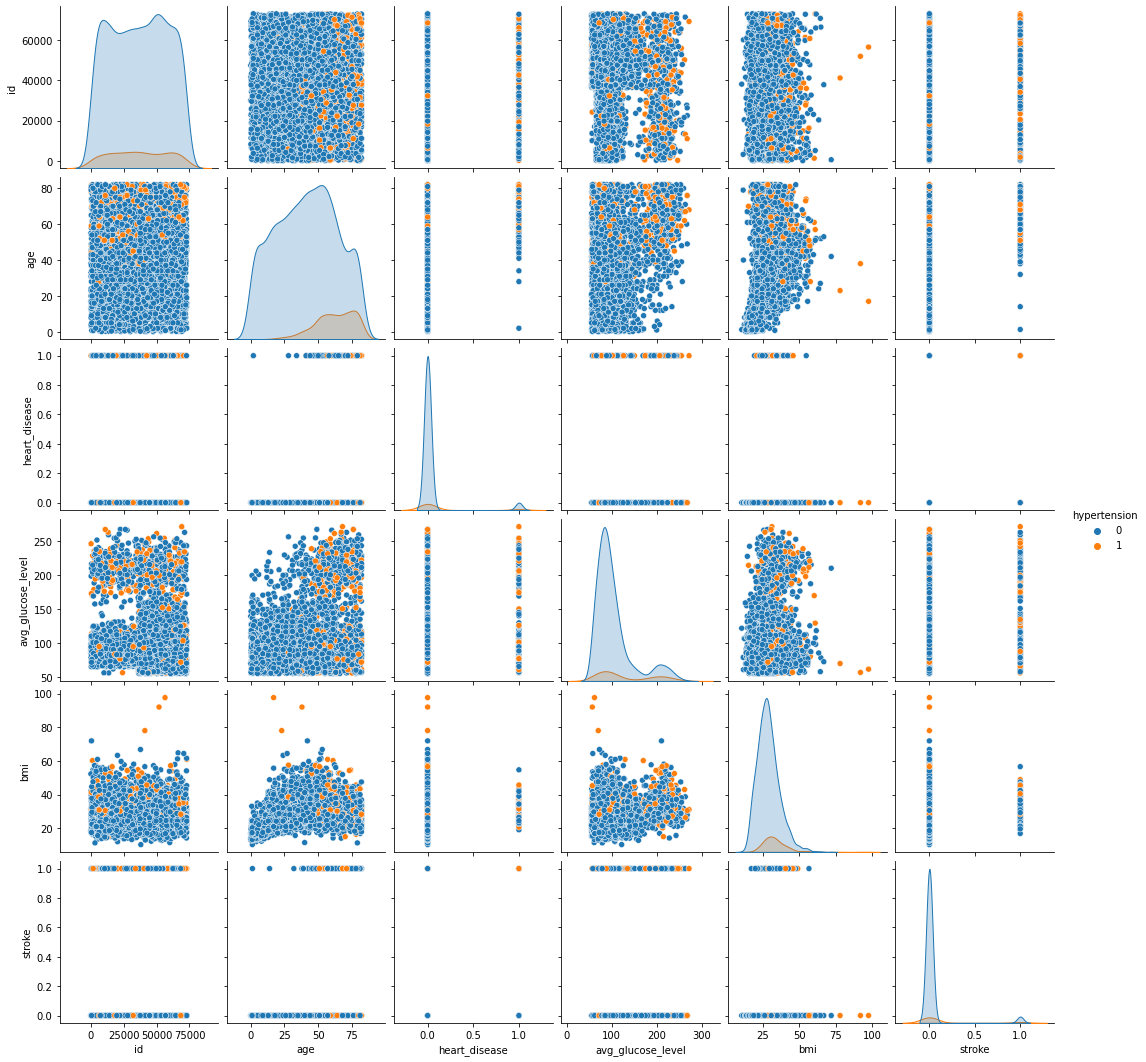

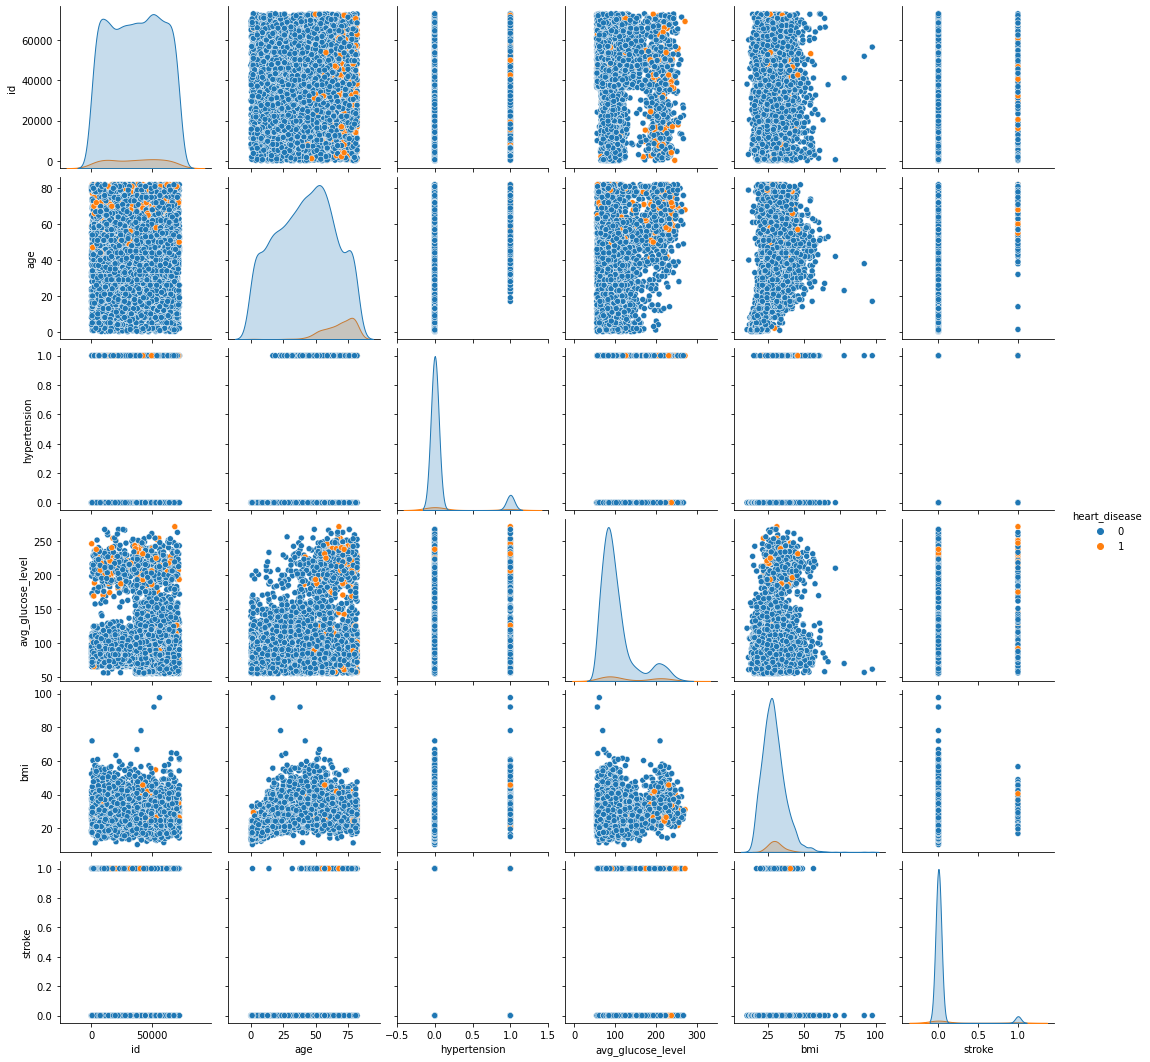

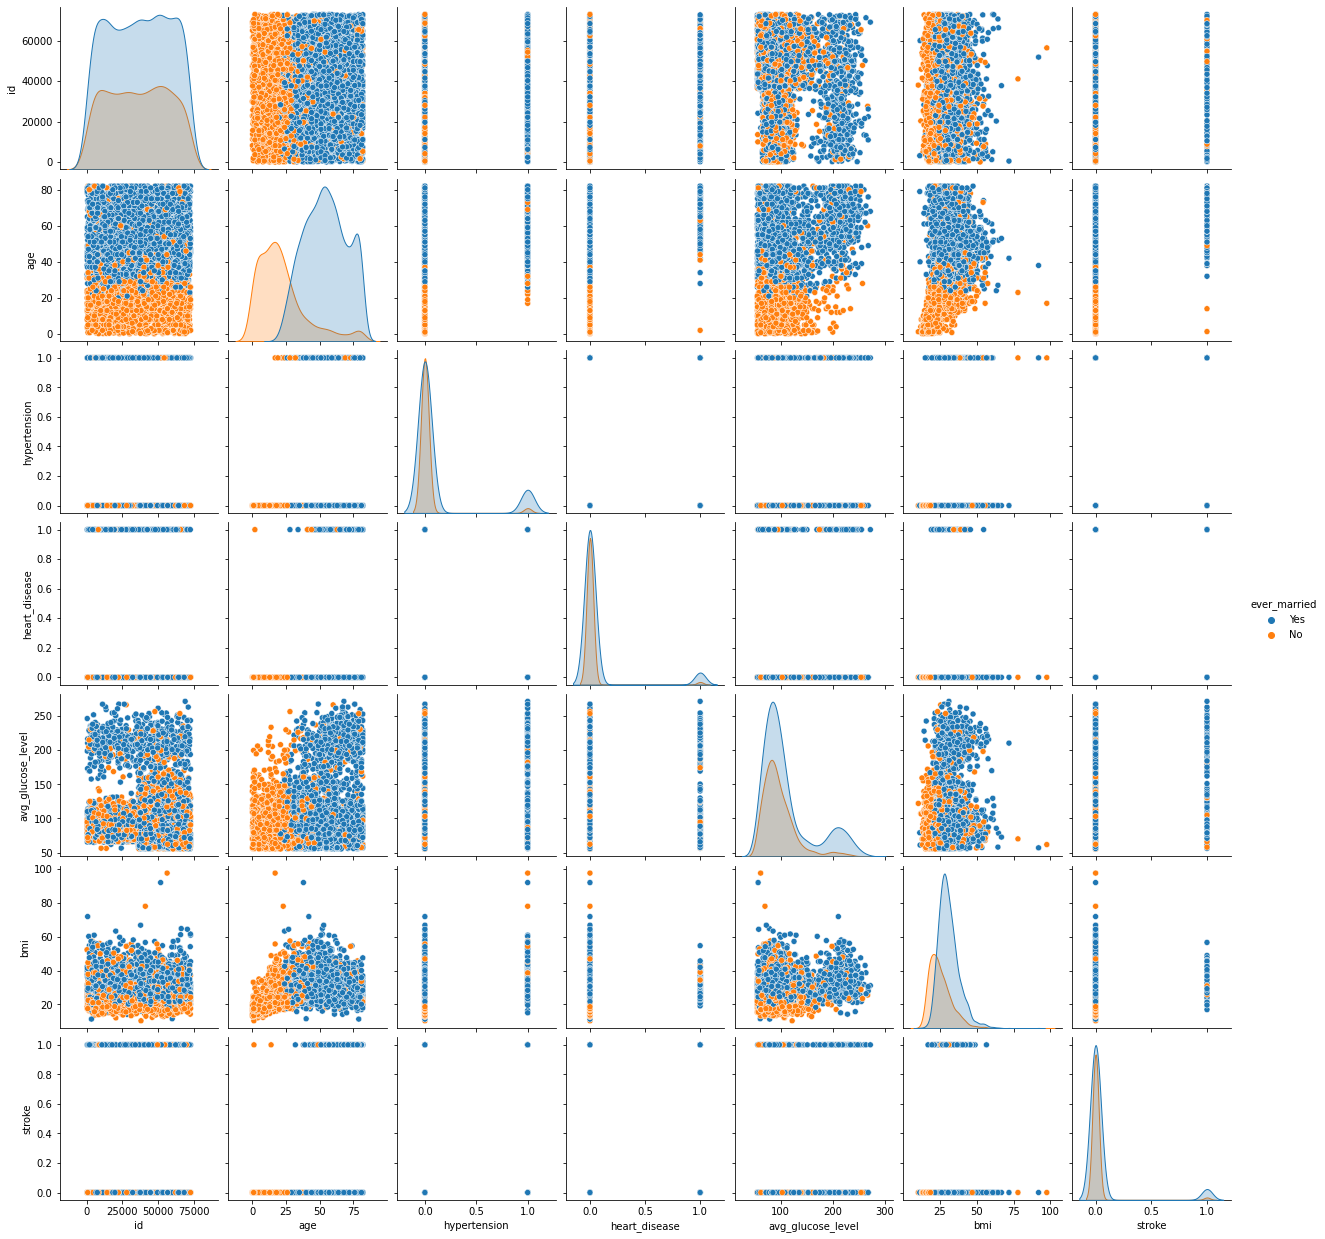

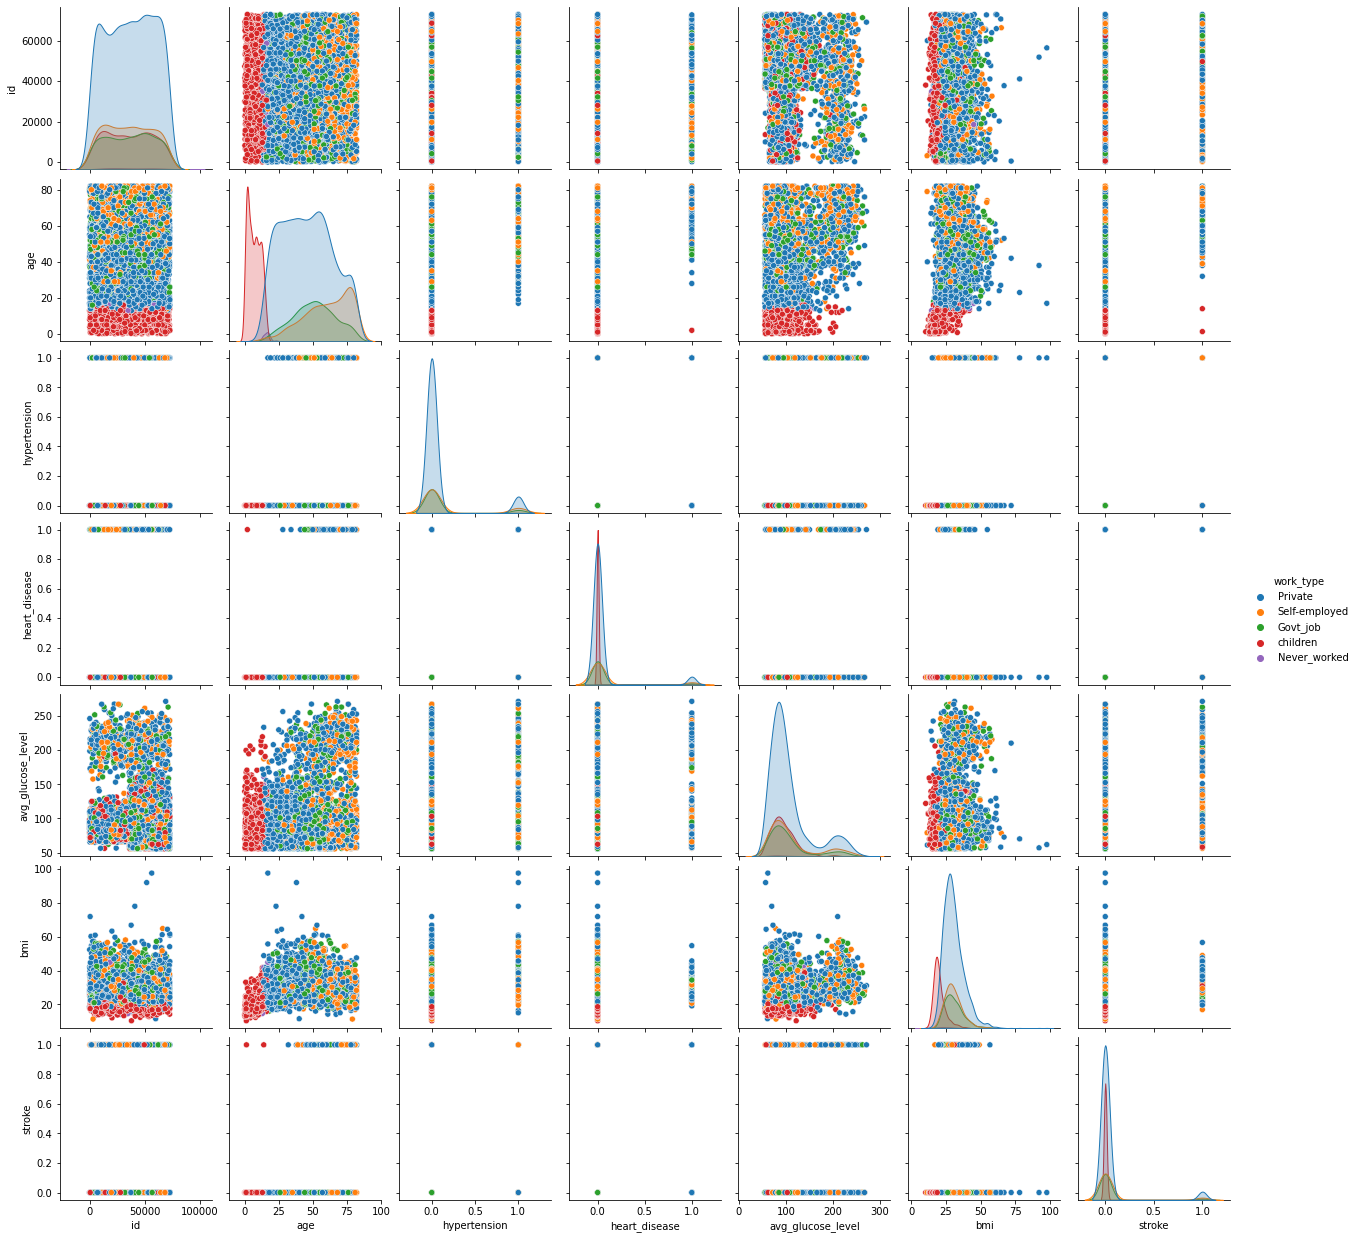

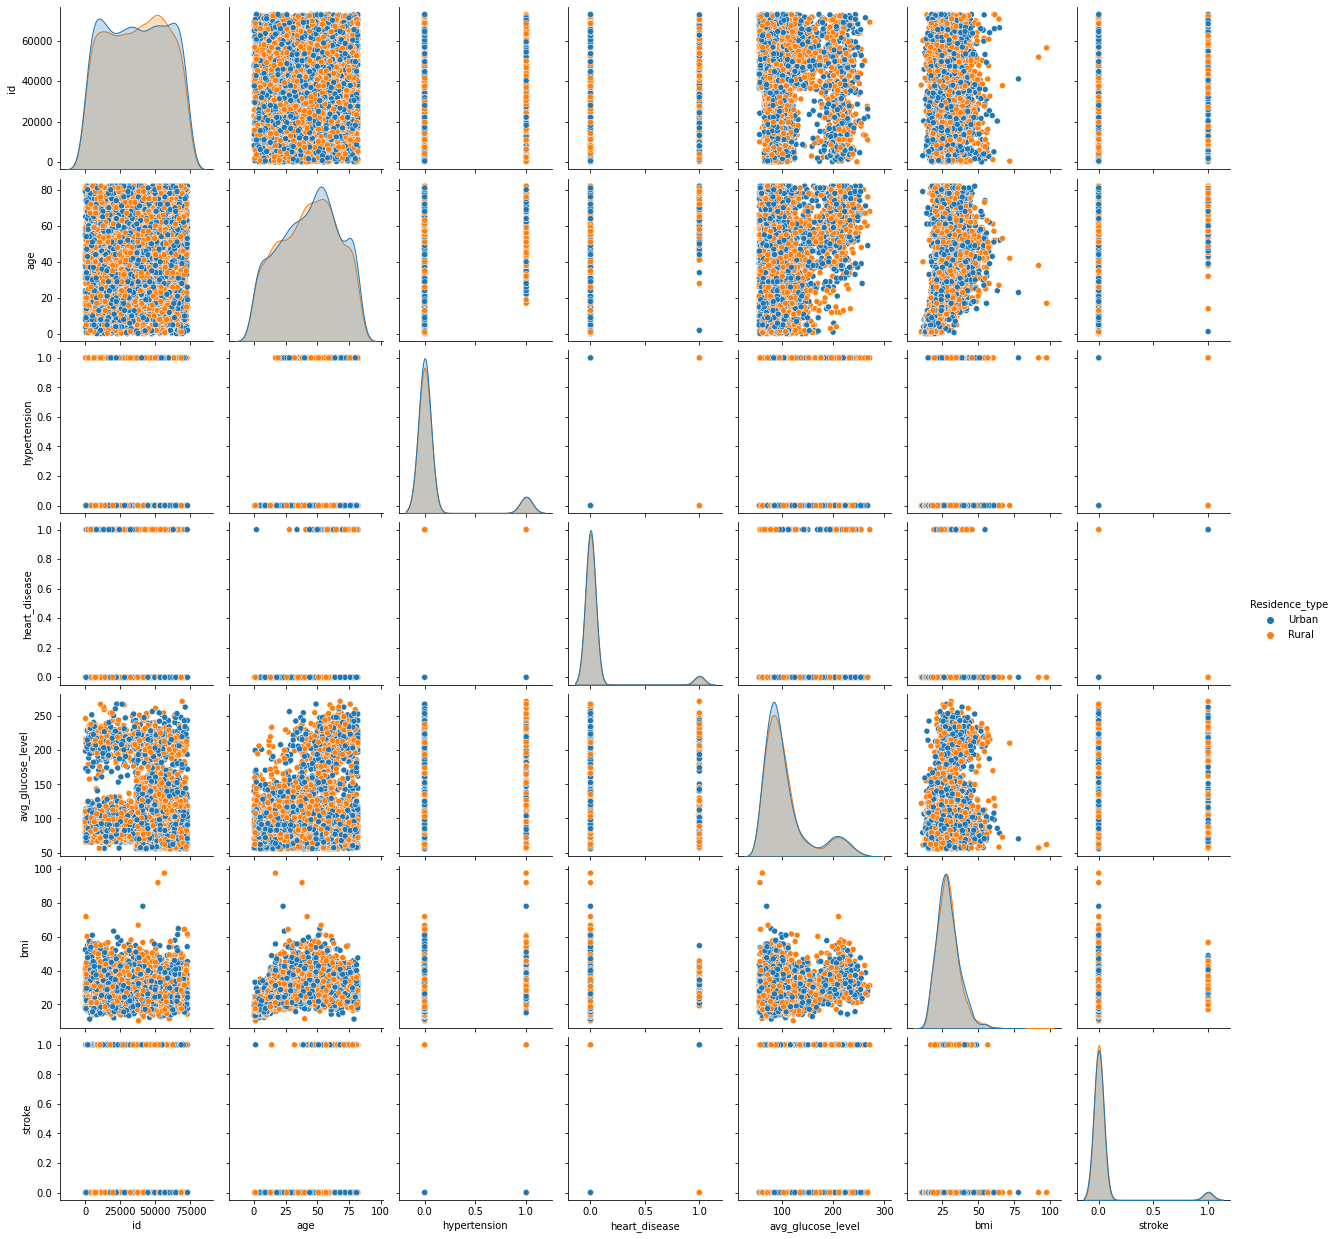

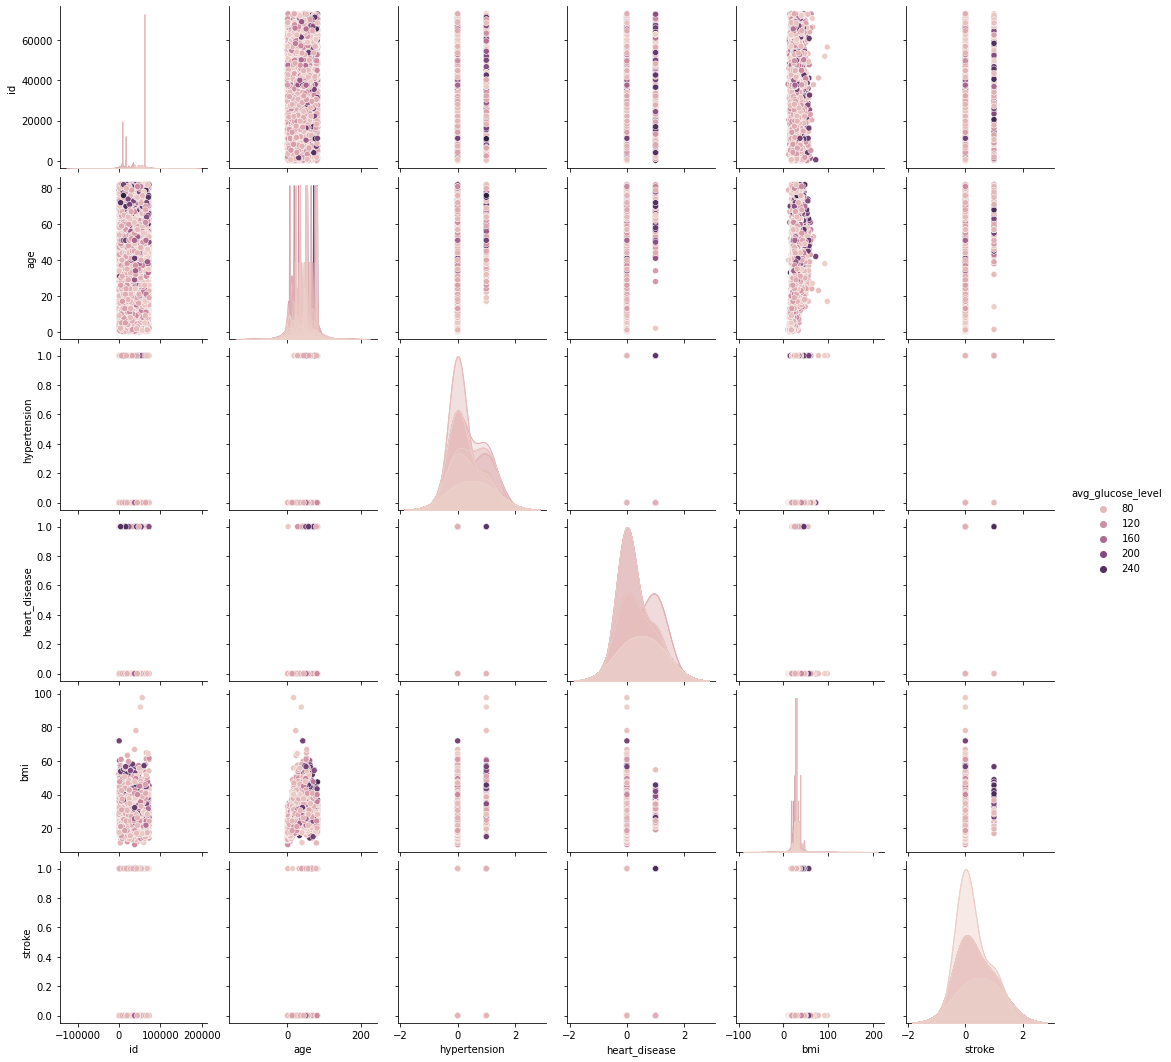

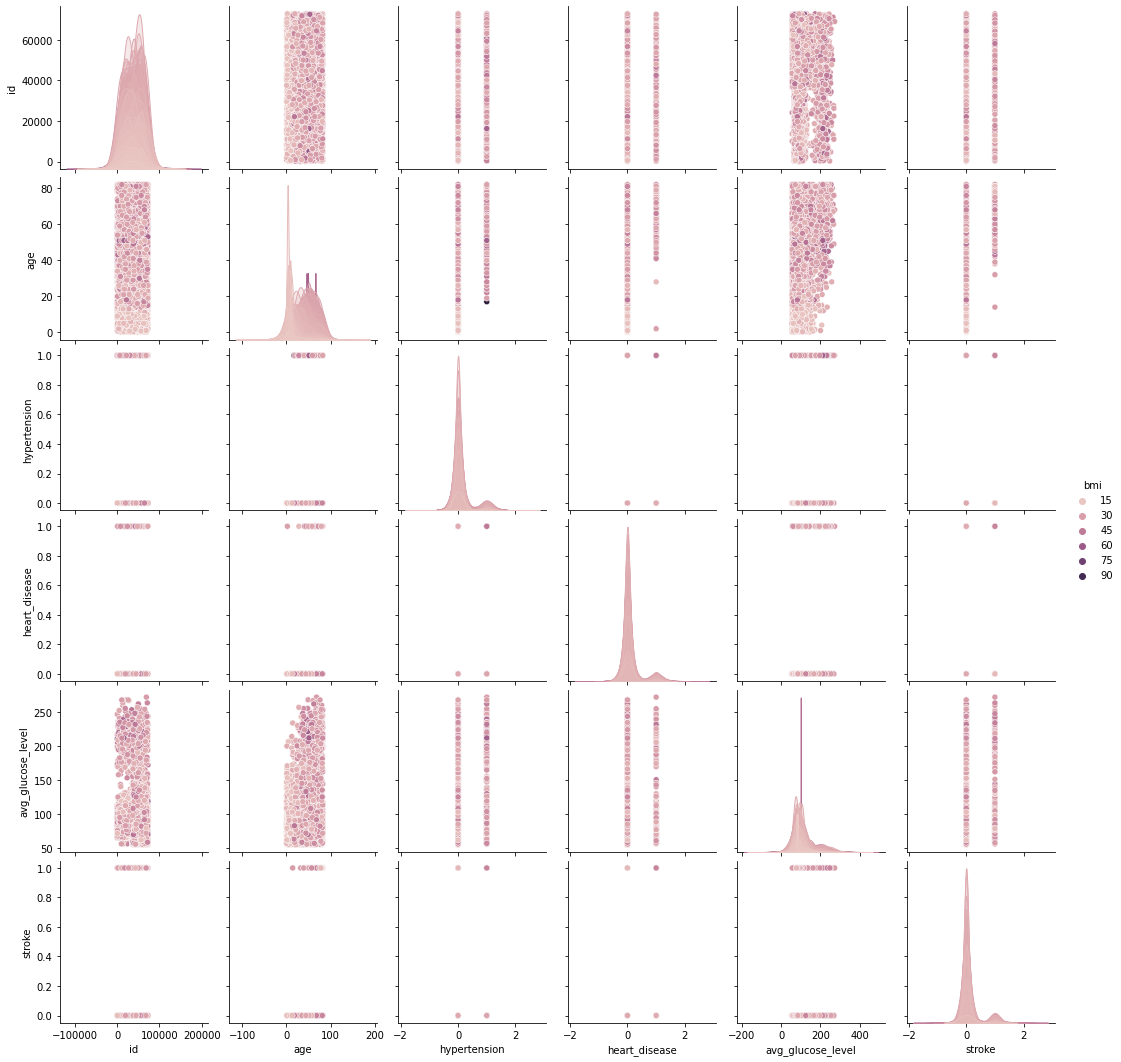

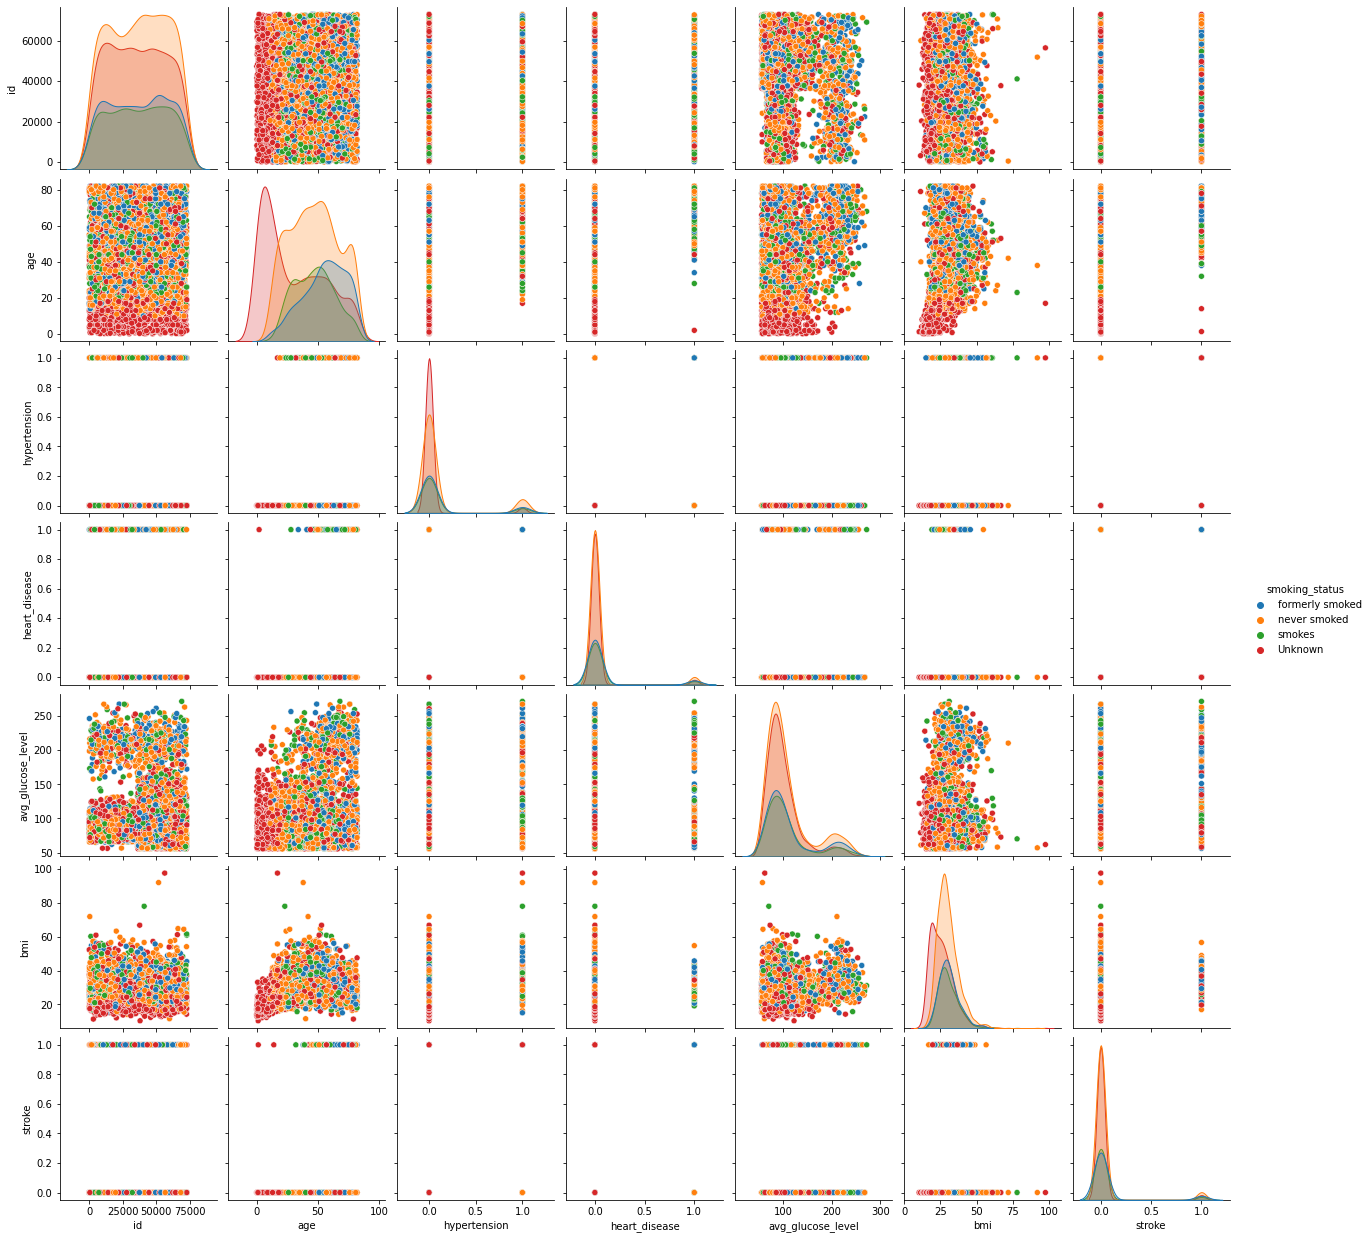

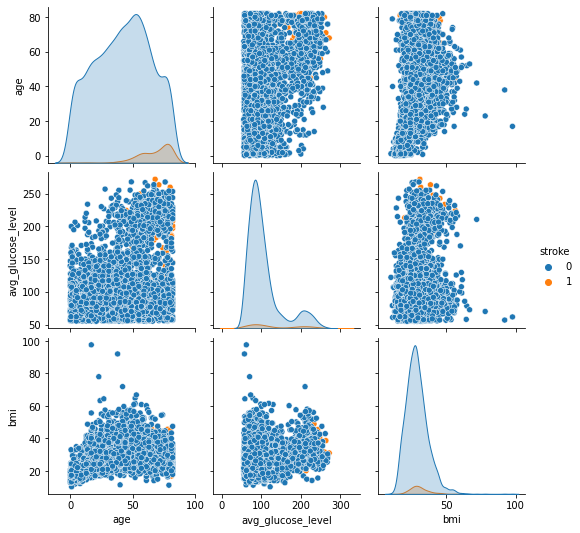

In [ ]:
sns.pairplot(df, hue ='gender')
plt.show()
sns.pairplot(df, hue ='age')
plt.show()
sns.pairplot(df, hue ='hypertension')
plt.show()
sns.pairplot(df, hue ='heart_disease')
plt.show()
sns.pairplot(df, hue ='ever_married')
plt.show()
sns.pairplot(df, hue ='work_type')
plt.show()
sns.pairplot(df, hue ='Residence_type')
plt.show()
sns.pairplot(df, hue ='avg_glucose_level')
plt.show()
sns.pairplot(df, hue ='bmi')
plt.show()
sns.pairplot(df, hue ='smoking_status')
plt.show()

numerical_data = df[['age','avg_glucose_level','bmi','stroke']]
#distribution plots and scatter plots between our numerical variables with hue the stroke variable
numerical_data = sns.pairplot(numerical_data, hue='stroke')

7. DisPlot

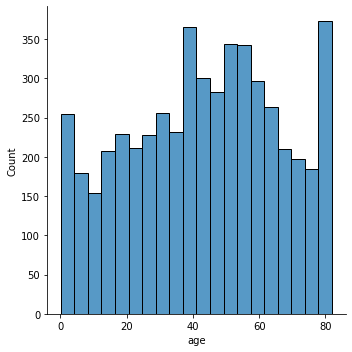

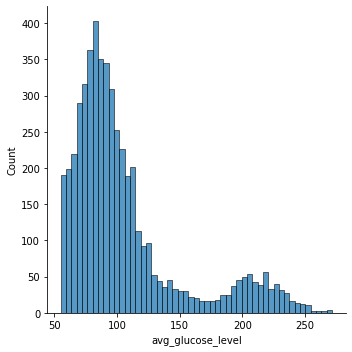

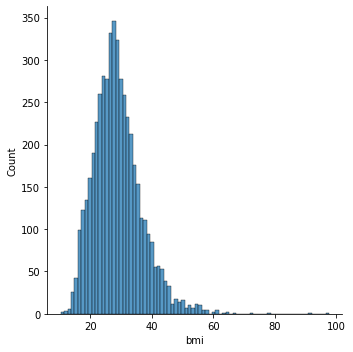

In [ ]:
sns.displot(df['age'])
plt.show()
sns.displot(df['avg_glucose_level'])
plt.show()
sns.displot(df['bmi'])
plt.show()


8. Rug Plot

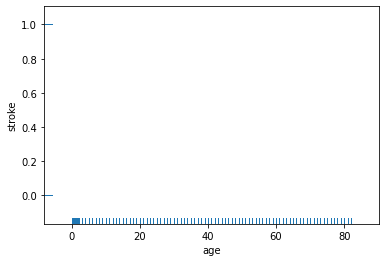

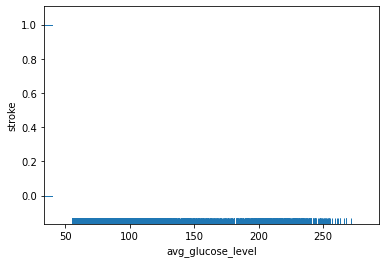

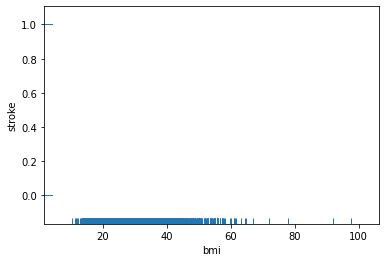

In [ ]:
sns.rugplot(data=df, x="age", y="stroke")
plt.show()
sns.rugplot(data=df, x="avg_glucose_level", y="stroke")
plt.show()
sns.rugplot(data=df, x="bmi", y="stroke")
plt.show()


9. Violin Plot

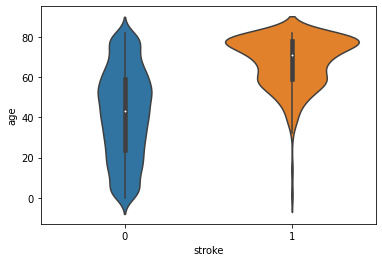

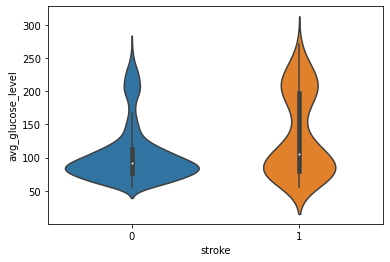

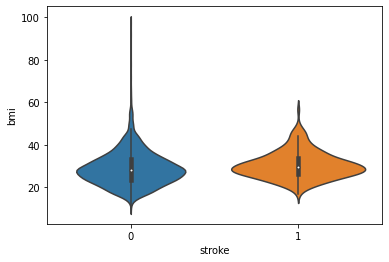

In [ ]:
sns.violinplot(x ="stroke",y ="age",data = df)
plt.show()
sns.violinplot(x ="stroke",y ="avg_glucose_level",data = df)
plt.show()
sns.violinplot(x ="stroke",y ="bmi",data = df)
plt.show()

10. Swarm Plot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


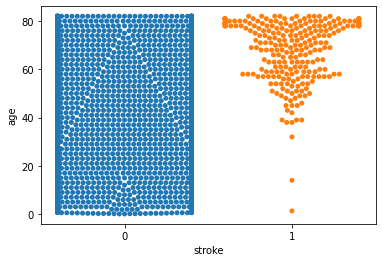

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


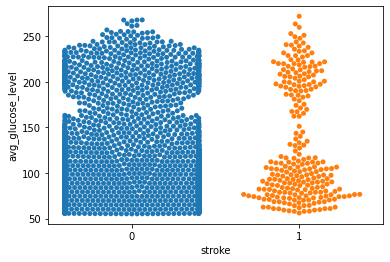

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


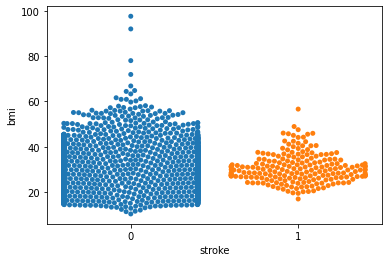

In [ ]:
sns.swarmplot(data=df, x="stroke", y="age")
plt.show()
sns.swarmplot(data=df, x="stroke", y="avg_glucose_level")
plt.show()
sns.swarmplot(data=df, x="stroke", y="bmi")
plt.show()

11. Pie Chart For Stroke

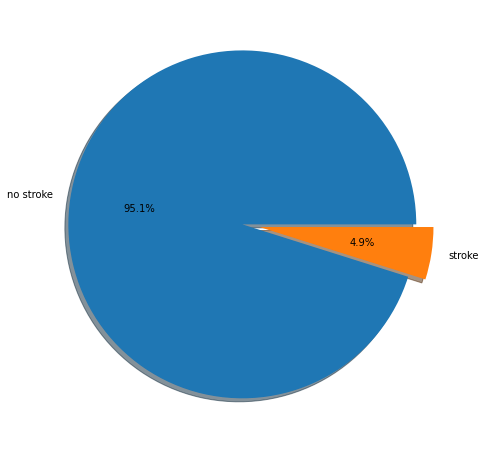

In [ ]:
pie_df=pd.DataFrame(df.groupby('stroke')['stroke'].count())
plt.figure(figsize=(8,8))
#pie_df
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',radius=1,explode = (0, 0.1),shadow=True)
plt.show()

12. Normal Curve

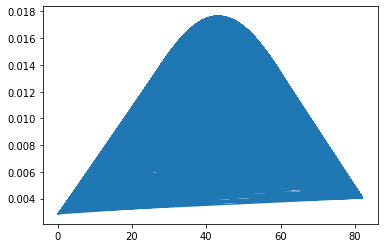

In [ ]:
plt.plot(df.age, norm.pdf(df.age, df.age.mean(), df.age.std()))
plt.show()

#**Feature Engineering**

Data And Target Separation

In [ ]:
data = df.drop('stroke', axis = 1) #axis = 1 - column, axis = 0 - rows
data.drop('id', axis = 1, inplace = True)
target = df.stroke
print('Data Shape: ', data.shape)
print('Target Shape: ', target.shape)

Data Shape:  (5110, 10)
Target Shape:  (5110,)


1. Handling Missing Values

In [ ]:
data.bmi.interpolate(method ='linear', limit_direction ='both', inplace = True)
#Linear interpolation provides a better approximation to the missing value than filling these with mean/median/mode
#If there's no fit for the missing value, interpolation does not fill in those values
#In such cases, the mean value is simply filled in
data.bmi.fillna( data.bmi.mean(),inplace = True)
print('\nSum of Null Values:\n', data.isnull().sum())
data



Sum of Null Values:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level    bmi   smoking_status  
0             Urban             228.69  36.60  formerly smoked  
1             Rural             202.21  34.55     never smoked  
2             Rural             105.92  32.50     never smoked  
3             Urban             171.23  34.40           smokes  
4             Rural             174.12  24.00     never smoked  
...             ...                ...    ...              ...  
5105          Urban              83.75  29.30     never smoked  
5106          Urban             125.20  40.00     never smoked  
5107          Rural              82.99  30.60     never smoked  
5108          Rural             166.29  25.60  formerly smoked  
5109          Urban              85.28  26.20          Unknown  

[5110 rows x 10 columns]

2. Label Encoding

In [ ]:
labelencoder = LabelEncoder()

data.gender = labelencoder.fit_transform(data.gender)
data.ever_married = labelencoder.fit_transform(data.ever_married)
data.work_type = labelencoder.fit_transform(data.work_type)
data.Residence_type = labelencoder.fit_transform(data.Residence_type)
data.smoking_status = labelencoder.fit_transform(data.smoking_status)

data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level    bmi  smoking_status  
0                  1             228.69  36.60               1  
1                  0             202.21  34.55               2  
2                  0             105.92  32.50               2  
3                  1             171.23  34.40               3  
4                  0             174.12  24.00               2  
...              ...                ...    ...             ...  
5105               1              83.75  29.30               2  
5106               1             125.20  40.00               2  
5107               0              82.99  30.60               2  
5108               0             166.29  25.60               1  
5109               1              85.28  26.20               0  

[5110 rows x 10 columns]

4.Handling Imbalance in the dataset using SMOTE

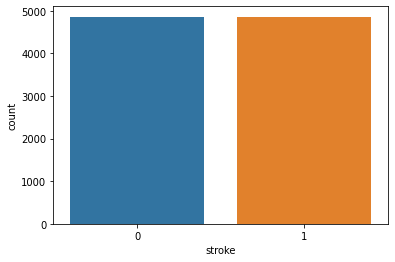

In [ ]:
sampler = SMOTE(random_state = 42)
data, target = sampler.fit_resample(data,target.values.ravel())
target = pd.DataFrame({'stroke':target})
sns.countplot(data = target, x = 'stroke', y= None)
plt.show()

Train Test Split of dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data,target,test_size=0.2,random_state=10)
X_train

gender        age  hypertension  heart_disease  ever_married  work_type  \
1304       0  46.000000             0              0             0          2   
6763       1  58.777717             0              0             1          2   
9053       1  71.034842             0              1             0          0   
7627       0  75.498439             0              0             1          0   
8108       0  55.762290             0              0             1          2   
...      ...        ...           ...            ...           ...        ...   
9372       0  60.678894             0              0             1          2   
7291       1  75.639106             0              0             1          2   
1344       1  47.000000             0              0             1          2   
7293       0  81.000000             0              0             1          2   
1289       0  80.000000             0              0             1          3   

      Residence_type  avg_glucose_level        bmi  smoking_status  
1304               0          79.630000  55.000000               0  
6763               1          85.356430  29.866630               1  
9053               0         216.988605  30.859932               2  
7627               1          62.675388  33.971175               0  
8108               0         210.662990  39.285353               2  
...              ...                ...        ...             ...  
9372               1         111.706964  37.528442               2  
7291               1         220.981099  26.215419               2  
1344               0          86.370000  39.200000               3  
7293               0          80.010179  23.064836               1  
1289               0          72.610000  27.600000               2  

[7777 rows x 10 columns]

5. Handling Outliers using Z Score Normalisation

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

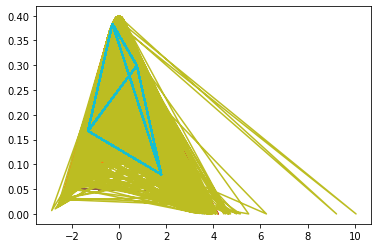

In [ ]:
plt.plot(X_train, norm.pdf(X_train, X_train.mean(), X_train.std()))
plt.show()

#**ML Training Models**

Performance Evaluation

In [ ]:
y=target
def cross_val(model,x,cv = 10):   #Create a function for applying cross validation
    '''
    This function for applying cross validation and return  it's performance.
    INPUT:
    model: A ML model.
    x: numpy.ndarray. The features.
    cv: int. The cross validation splitting strategy.
    OUTPUT:
    The cross validation performance.
    '''
    print('----------------- After cross validation -----------------')
    global y
    cv_res = cross_validate(estimator=model,X=x,y=y,n_jobs=-1,cv=cv,return_train_score = True)
    y_pred = cross_val_predict(estimator=model,X=x,y=y,n_jobs=-1,cv=cv)
    print('Training Score:',cv_res['train_score'].mean())
    print('Testing Score:',accuracy_score(y,y_pred))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y,y_pred),annot=True,cmap='GnBu',fmt = 'd')
    plt.title('The Confusion Matrix',color='black')
    plt.xlabel('Predicted',color='black')
    plt.ylabel('Actual',color='black')
    plt.show()
    print(classification_report(y,y_pred))

1. K-Nearest Neighbours

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training Score: 0.9119197634049119
Testing Score: 0.8704370179948586
----------------- After cross validation -----------------
Training Score: 0.9216096154662574
Testing Score: 0.8963176301172598


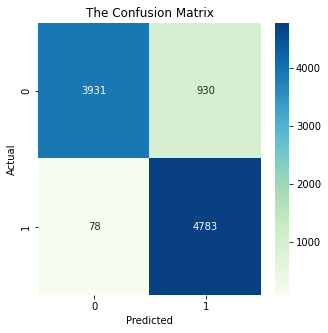

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      4861
           1       0.84      0.98      0.90      4861

    accuracy                           0.90      9722
   macro avg       0.91      0.90      0.90      9722
weighted avg       0.91      0.90      0.90      9722



In [ ]:
KNN = KNeighborsClassifier()

KNN.fit(X_train, Y_train)
knn_ytrain_pred = KNN.predict(X_train)
knn_ytest_pred = KNN.predict(X_test)

print('Training Score:',accuracy_score(Y_train,knn_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,knn_ytest_pred))

cross_val(KNeighborsClassifier(),data)

2. Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.8116240195448117
Testing Score: 0.8107969151670951
----------------- After cross validation -----------------
Training Score: 0.8109442816321865
Testing Score: 0.8081670438181444


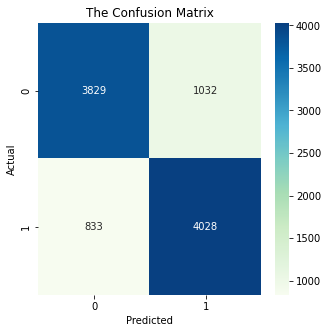

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      4861
           1       0.80      0.83      0.81      4861

    accuracy                           0.81      9722
   macro avg       0.81      0.81      0.81      9722
weighted avg       0.81      0.81      0.81      9722



In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

lr_ytrain_pred = log_reg.predict(X_train)
lr_ytest_pred = log_reg.predict(X_test)

print('Training Score:',accuracy_score(Y_train,lr_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,lr_ytest_pred))

cross_val(LogisticRegression(),data)

3. Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Score: 0.7884788478847885
Testing Score: 0.8010282776349614
----------------- After cross validation -----------------
Training Score: 0.7881666515356857
Testing Score: 0.7875951450318864


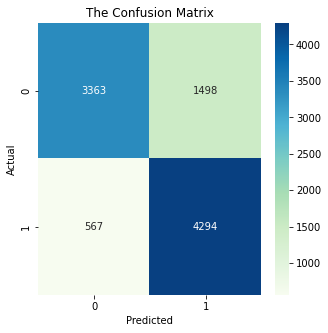

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      4861
           1       0.74      0.88      0.81      4861

    accuracy                           0.79      9722
   macro avg       0.80      0.79      0.79      9722
weighted avg       0.80      0.79      0.79      9722



In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train,Y_train)

rf_ytrain_pred = rf.predict(X_train)
rf_ytest_pred = rf.predict(X_test)

print('Training Score:',accuracy_score(Y_train,rf_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,rf_ytest_pred))

cross_val(RandomForestClassifier(max_depth=2, random_state=0),data)

4. Decision Tree

Training Score: 1.0
Testing Score: 0.9172236503856042
----------------- After cross validation -----------------
Training Score: 1.0
Testing Score: 0.9158609339642049


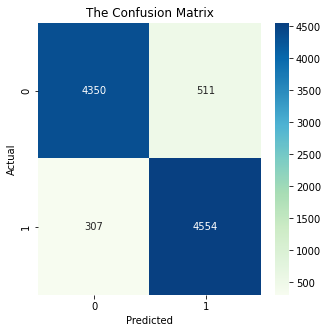

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4861
           1       0.90      0.94      0.92      4861

    accuracy                           0.92      9722
   macro avg       0.92      0.92      0.92      9722
weighted avg       0.92      0.92      0.92      9722



In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,Y_train) #fitting the preprocessed data with the decision tree algorithm

dt_ytrain_pred = DecisionTree.predict(X_train)
dt_ytest_pred = DecisionTree.predict(X_test)

print('Training Score:',accuracy_score(Y_train,dt_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,dt_ytest_pred))

cross_val(DecisionTreeClassifier(),data)

5. Gaussian Naive Bayes'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.7844927349877845
Testing Score: 0.7917737789203085
----------------- After cross validation -----------------
Training Score: 0.7876981075388206
Testing Score: 0.7844065007200165


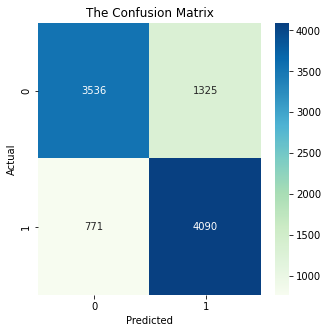

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      4861
           1       0.76      0.84      0.80      4861

    accuracy                           0.78      9722
   macro avg       0.79      0.78      0.78      9722
weighted avg       0.79      0.78      0.78      9722



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

gnb_ytrain_pred = gnb.predict(X_train)
gnb_ytest_pred = gnb.predict(X_test)

print('Training Score:',accuracy_score(Y_train,gnb_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,gnb_ytest_pred))

cross_val(GaussianNB(),data)

6. Bagging Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.9997428314259997
Testing Score: 0.9465295629820052
----------------- After cross validation -----------------
Training Score: 0.9972227996669007
Testing Score: 0.9419872454227525


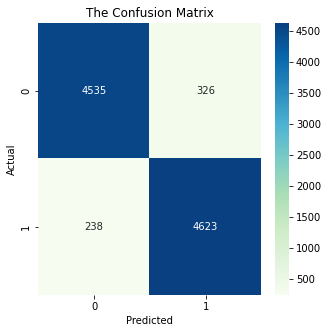

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4861
           1       0.93      0.95      0.94      4861

    accuracy                           0.94      9722
   macro avg       0.94      0.94      0.94      9722
weighted avg       0.94      0.94      0.94      9722



In [ ]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)

bag_model.fit(X_train, Y_train)

bag_ytrain_pred = bag_model.predict(X_train)
bag_ytest_pred = bag_model.predict(X_test)

print('Training Score:',accuracy_score(Y_train,bag_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,bag_ytest_pred))

cross_val(BaggingClassifier(),data)

7. Support Vector Machines(SVM)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.8667866786678667
Testing Score: 0.8586118251928021
----------------- After cross validation -----------------
Training Score: 0.7772291977858694
Testing Score: 0.7765891791812384


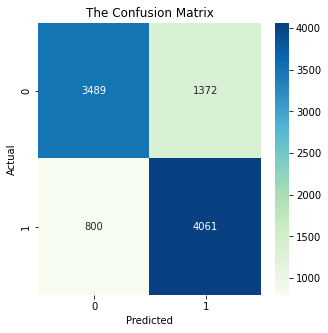

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      4861
           1       0.75      0.84      0.79      4861

    accuracy                           0.78      9722
   macro avg       0.78      0.78      0.78      9722
weighted avg       0.78      0.78      0.78      9722



In [ ]:
SVM = SVC()
SVM.fit(X_train, Y_train)

svm_ytrain_pred = SVM.predict(X_train)
svm_ytest_pred = SVM.predict(X_test)

print('Training Score:',accuracy_score(Y_train,svm_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,svm_ytest_pred))

cross_val(SVC(),data)

8. Stacking Classifier(Combine the best models)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.9755689854699756
Testing Score: 0.9208226221079692
----------------- After cross validation -----------------
Training Score: 0.9865482683735284
Testing Score: 0.9364328327504629


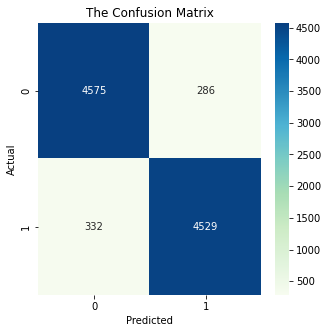

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4861
           1       0.94      0.93      0.94      4861

    accuracy                           0.94      9722
   macro avg       0.94      0.94      0.94      9722
weighted avg       0.94      0.94      0.94      9722



In [ ]:
models = [
    ('KNN',KNN),
    ('LR',log_reg),
    ('RF',rf),
    ('DecisionTree',DecisionTree),
    ('GNB',gnb),
    ('BAG',bag_model),
    ('SVM',SVM)]

stackmodel = StackingClassifier(estimators = models, final_estimator = DecisionTreeClassifier())
stackmodel.fit(X_train, Y_train)

stack_ytrain_pred = stackmodel.predict(X_train)
stack_ytest_pred = stackmodel.predict(X_test)

print('Training Score:',accuracy_score(Y_train,stack_ytrain_pred))
print('Testing Score:',accuracy_score(Y_test,stack_ytest_pred))

cross_val(StackingClassifier(estimators = models, final_estimator = DecisionTreeClassifier()),data)